In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('C:/Users/Manasi/Downloads/survey (1).csv')  # Replace with your actual file path
data.head()  # Display the first few rows to understand the structure


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# Drop rows with missing values in essential columns
data = data.dropna(subset=['Age', 'Gender', 'treatment'])

# Clean 'Age' column by removing outliers (assuming reasonable age range 18-100)
data = data[(data['Age'] >= 18) & (data['Age'] <= 100)]

# Standardize 'Gender' column to improve consistency
data['Gender'] = data['Gender'].str.strip().str.capitalize()

# Check for other missing values
data.info()  # This will show any columns with null values


<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1251 non-null   object
 1   Age                        1251 non-null   int64 
 2   Gender                     1251 non-null   object
 3   Country                    1251 non-null   object
 4   state                      738 non-null    object
 5   self_employed              1233 non-null   object
 6   family_history             1251 non-null   object
 7   treatment                  1251 non-null   object
 8   work_interfere             989 non-null    object
 9   no_employees               1251 non-null   object
 10  remote_work                1251 non-null   object
 11  tech_company               1251 non-null   object
 12  benefits                   1251 non-null   object
 13  care_options               1251 non-null   object
 14  wellness_prog

In [11]:
# Remove leading/trailing spaces from all column names
data.columns = data.columns.str.strip()

# Now access the 'work_interfere' column
work_interfere_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}
data['work_interfere_num'] = data['work_interfere'].map(work_interfere_mapping)


In [12]:
# Check the cleaned column names
print(data.columns)


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments',
       'Treatment_Numeric', 'work_interfere_num'],
      dtype='object')


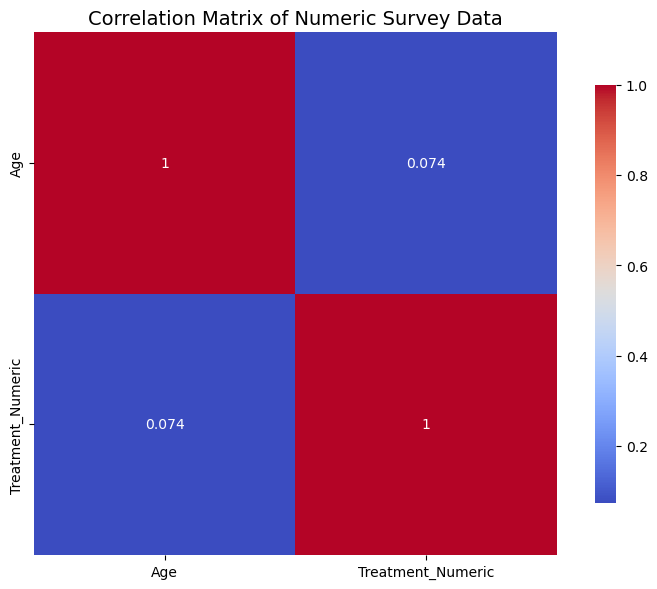

In [7]:
# Compute the correlation matrix only for numeric columns
numeric_data = data.select_dtypes(include='number')  # Select only numeric columns
correlation_matrix = numeric_data.corr()

# Check if correlation matrix is empty or valid
if not correlation_matrix.empty:
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Matrix of Numeric Survey Data', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("Error: No numeric data available for correlation heatmap.")



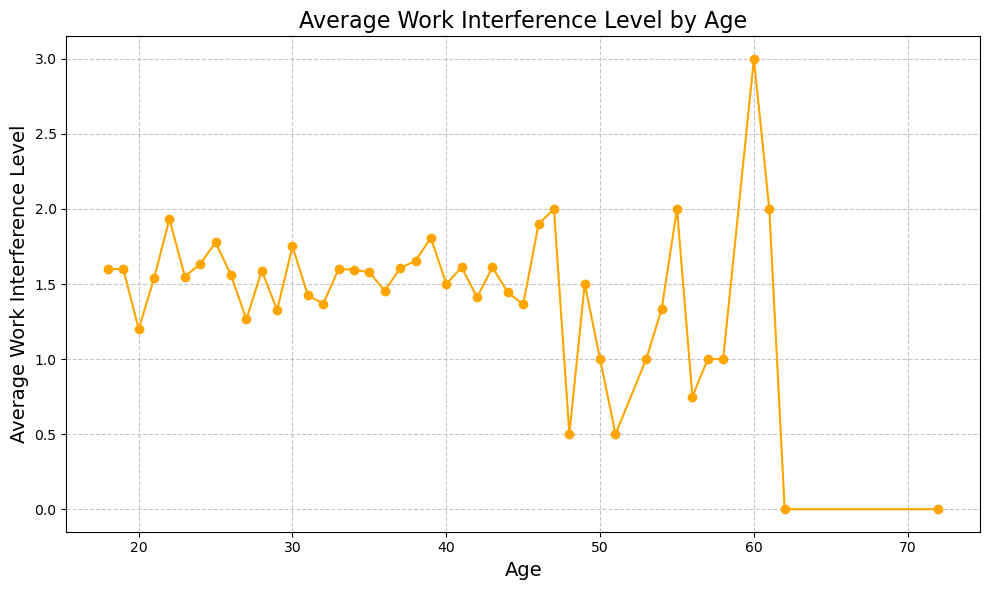

In [20]:

# Step 3: Line Plot - Average Work Interference by Age

# Calculate the average work interference level by age
average_work_interfere_by_age = data_cleaned.groupby('Age')['Work_Interfere_Num'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_work_interfere_by_age.index, average_work_interfere_by_age.values, color='orange', marker='o')

# Adding labels and title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Work Interference Level', fontsize=14)
plt.title('Average Work Interference Level by Age', fontsize=16)

# Show grid and plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

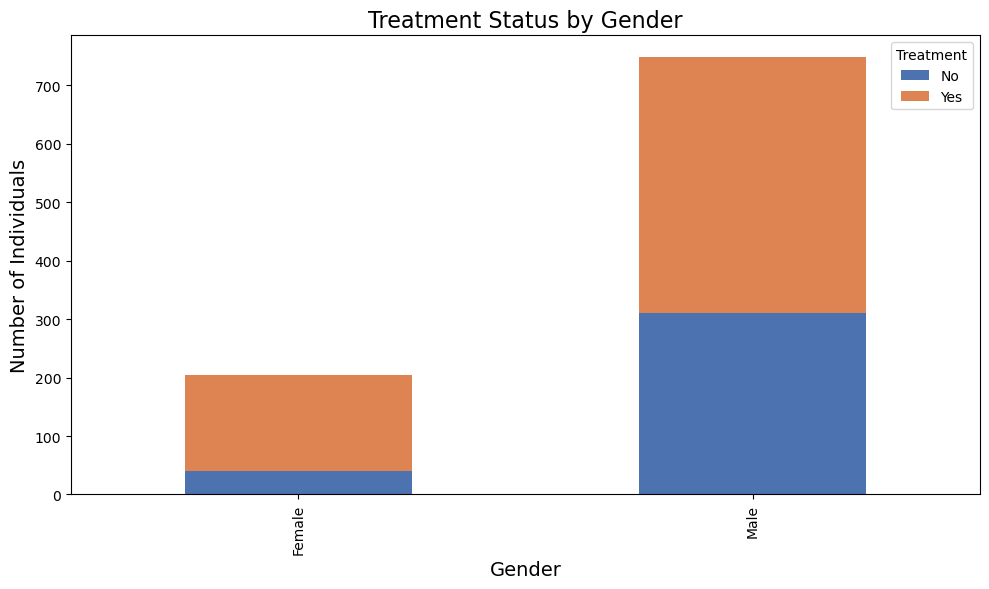

In [23]:
# Data Cleaning: Drop rows with missing values in 'Gender' or 'treatment'
data_cleaned = data.dropna(subset=['Gender', 'treatment'])

# Group by Gender and Treatment, then count the occurrences
treatment_counts = data_cleaned.groupby(['Gender', 'treatment']).size().unstack()

# Plot the bar graph
treatment_counts.plot(kind='bar', stacked=True, color=['#4C72B0', '#DD8452'], figsize=(10, 6))
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.title('Treatment Status by Gender', fontsize=16)
plt.legend(title='Treatment', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()